# Textbook example of sci-kit learn

Load a dataset
Preprocess it
Train a model
Evaluate results


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



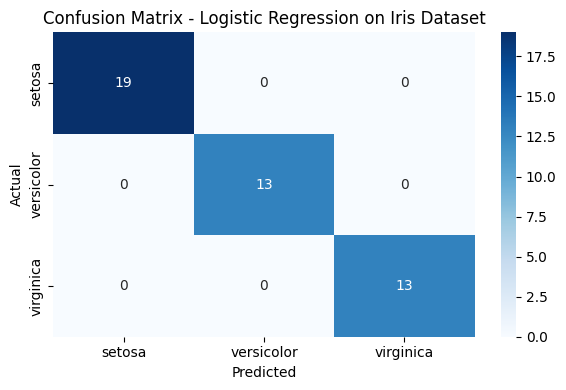

In [2]:
# import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# load data
iris = load_iris()
X = iris.data       # Features
y = iris.target     # Target labels (setosa 0, versicolor 1, virginica 2)

# Split the dataset into training and testing sets (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Standardize the features (important for many ML algos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_scaled, y_train)

# Make preditions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluation stage
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualize the confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression on Iris Dataset")
plt.tight_layout()
plt.show()


